# Business Objective : 
**Improve Movie Audience Satisfaction and Box Office Performance through Sentiment Analysis of IMDB Reviews.**



### Objective Description :

The goal of this project is to leverage sentiment analysis on the IMDB movie review dataset to gain insights into audience sentiments towards different movies. By analyzing movie reviews, the objective is to identify the factors that contribute to positive and negative audience sentiments. The findings will help movie studios and production companies make data-driven decisions to improve audience satisfaction and overall box office performance.

### Importing necessary libraries

In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [78]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.decomposition import TruncatedSVD
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/areebsayed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Read the data (csv)

In [3]:
df = pd.read_csv('Review.csv')

# Check first five rows of the data
df.head()

sentiment                                             review
0  Negative  I had no background knowledge of this movie be...
1  Negative  I am a huge Jane Austen fan and I ordered the ...
2  Negative  Nothing to say but Wow! Has anyone actually ha...
3  Negative  i like Jane Austin novels. I love Pride and Pr...
4  Negative  In this day and age of incredible special movi...

In [4]:
df.tail()

sentiment                                             review
9995  Positive  I first saw this movie back in the early'90's ...
9996  Positive  NYC, 2022: The Greenhouse effect, vanished oce...
9997  Positive  Those individuals familiar with Asian cinema, ...
9998  Positive  The kids, aged 7 to 14, got such a huge kick o...
9999  Positive  I so love this movie! The animation is great (...

In [5]:
# check the dimensions of the data 
df.shape

(10000, 2)

In [6]:
# check the data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  10000 non-null  object
 1   review     10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [7]:
# statistical summary of the data 
df.describe()

sentiment                                             review
count      10000                                              10000
unique         2                                               9990
top     Negative  This show comes up with interesting locations ...
freq        5081                                                  3

In [8]:
# check nulls
df.isna().sum()

sentiment    0
review       0
dtype: int64

In [9]:
# drop duplicate rows from the data 
df.drop_duplicates(inplace=True)
df.shape

(9990, 2)

# Exploratory Data Analysis (EDA)

In [10]:
# Count the number of positive and negative reviews
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts

Negative    5073
Positive    4917
Name: sentiment, dtype: int64

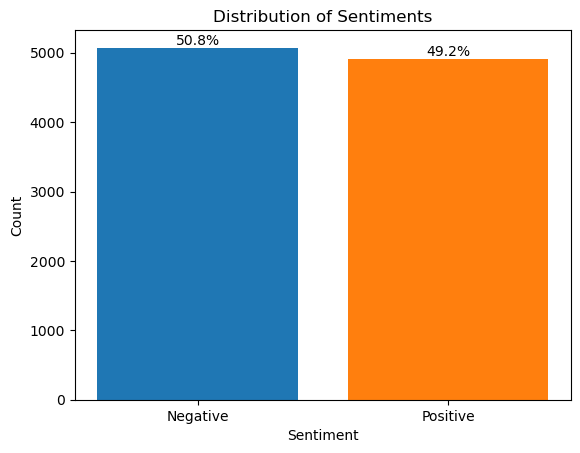

In [11]:
# Plot the sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values, color=('tab:blue','tab:orange'))
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Add percentages on top of each bar
total = sum(sentiment_counts.values)
for i, count in enumerate(sentiment_counts.values):
    percentage = count / total * 100
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

**Inference**

- The distribution of sentiments in our data is almost equally distributed. 

- Therefore, we can say that we have a balanced data 

# Data preprocessing

### Cleaning data

In [12]:
# Remove all the special characters
stop_words = set(stopwords.words('english'))
# Define a function to clean the text using regular expressions
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove any non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stop_words]
    text = ' '.join(tokens)
    
    return text

In [13]:
lemmatizer = WordNetLemmatizer()

In [14]:
# Clean the 'review' column and apply the clean text function here
df['review'] = df['review'].apply(clean_text)
df['review'].head() 

0    background knowledge movie bought sounded cool...
1    huge jane austen fan ordered movie amazonuk co...
2    nothing say wow anyone actually somebody sneak...
3    like jane austin novels love pride prejudice s...
4    day age incredible special movie effects one s...
Name: review, dtype: object

## WordCloud

### WordCloud for whole data 

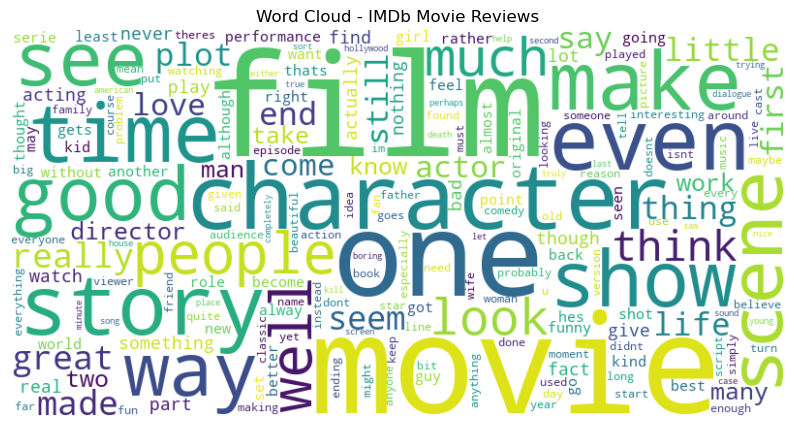

In [15]:
# Combine all the reviews into a single string
all_reviews = ' '.join(df['review'])

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - IMDb Movie Reviews')
plt.show()

In [16]:
df.sentiment = df.sentiment.astype('object')

In [17]:
#converting target variable to numeric labels
df.sentiment = [ 1 if each == "Positive" else 0 for each in df.sentiment]

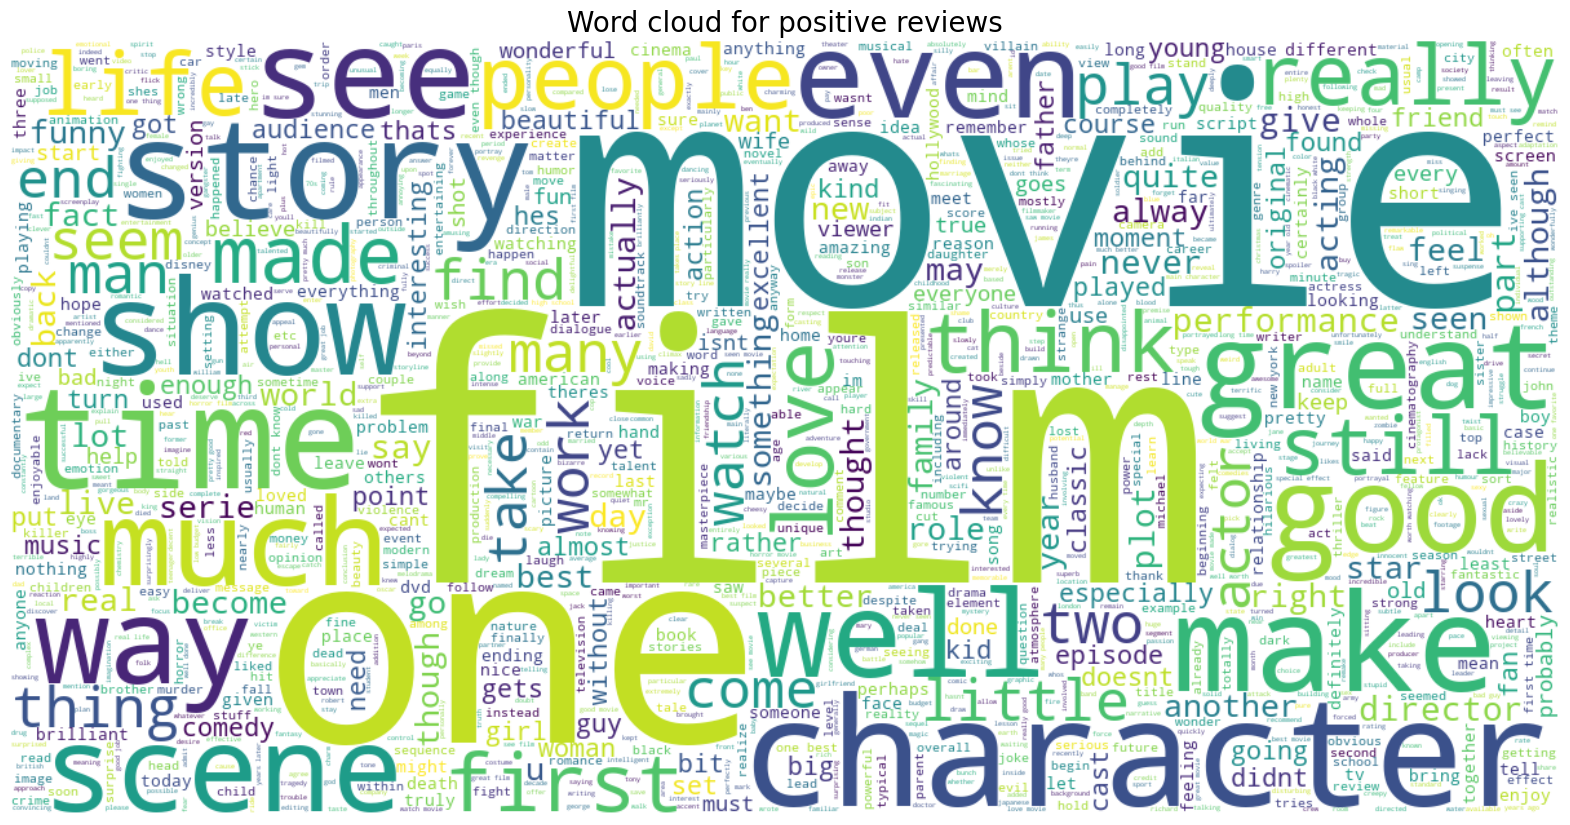

In [18]:
#word cloud for positive reviews
positive_data = df[df.sentiment == 1]['review']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

### WordCloud for negative sentiments

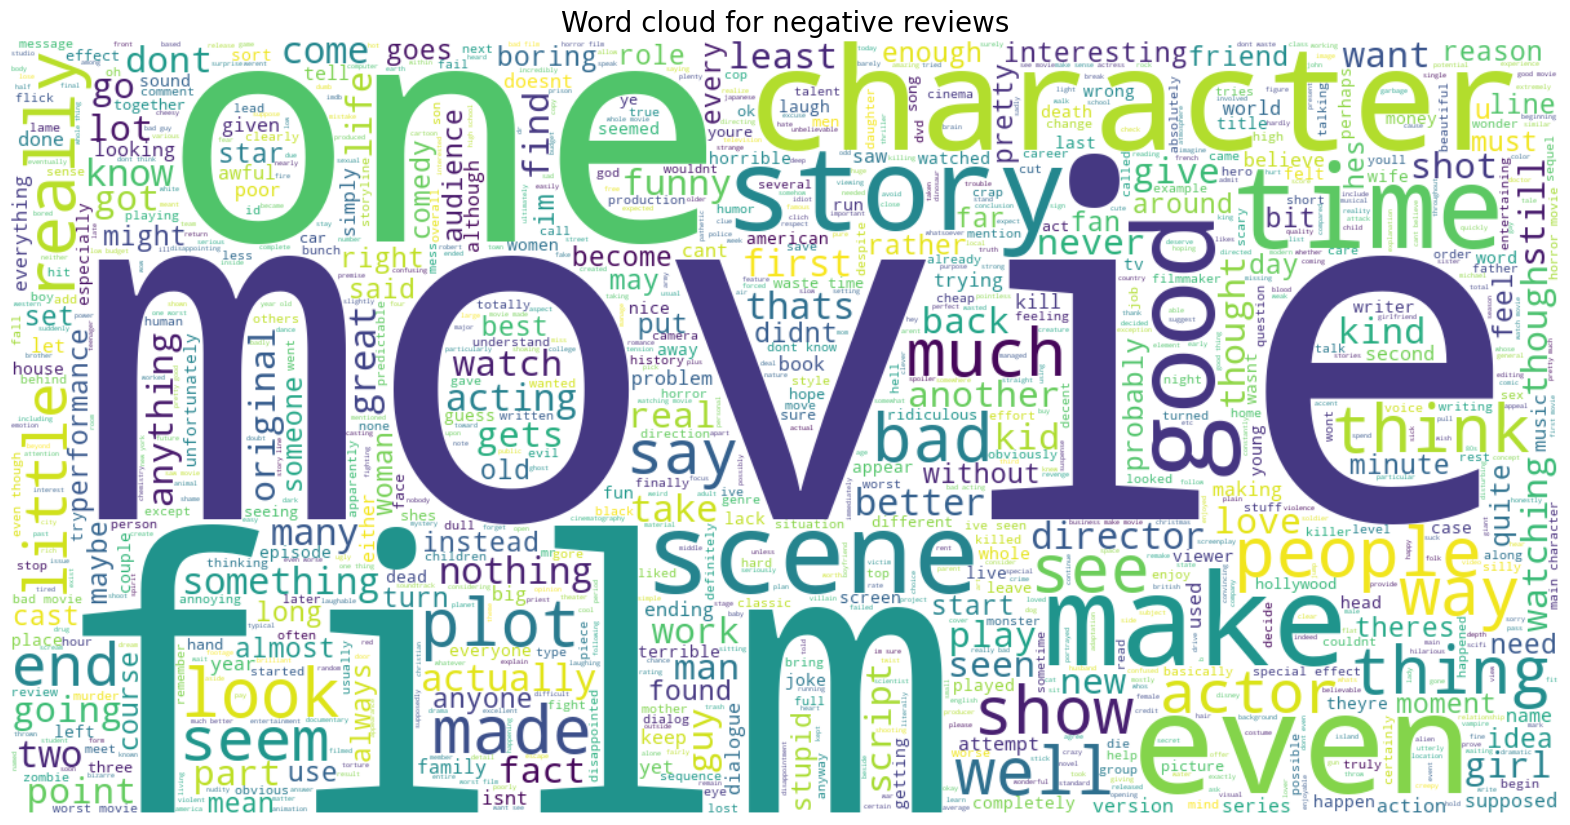

In [19]:
#word cloud for negative reviews
negative_data = df[df.sentiment == 0]['review']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

### Number of characters in each review

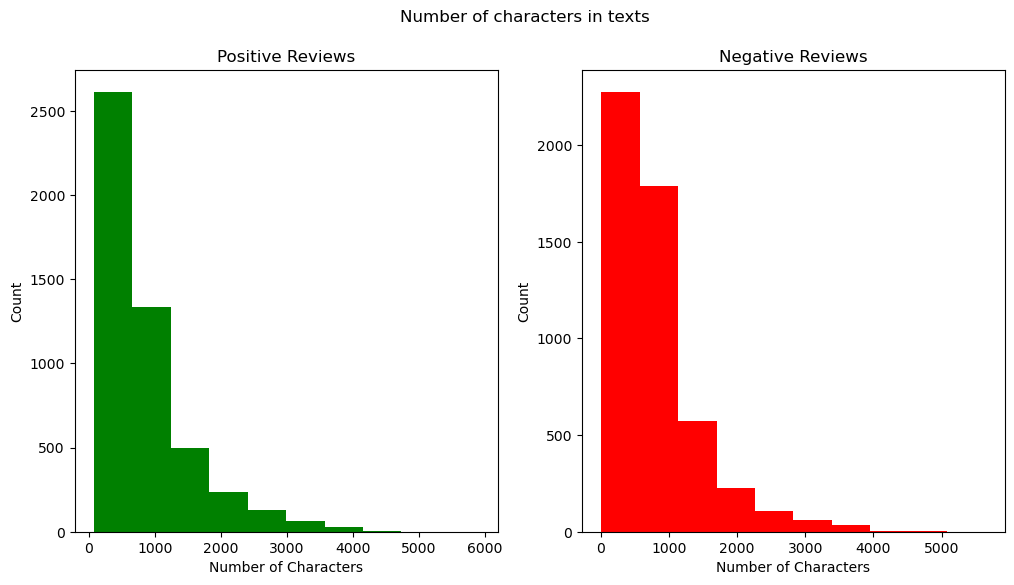

In [20]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
text_len=positive_data.str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Characters')
ax1.set_ylabel('Count')
text_len=negative_data.str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Count')
fig.suptitle('Number of characters in texts')
plt.show()

**Inference :**

Number of characters in negative reviews is higher which means the length of negative reviews are higher than compare to positive reviews.

### Number of words in each review

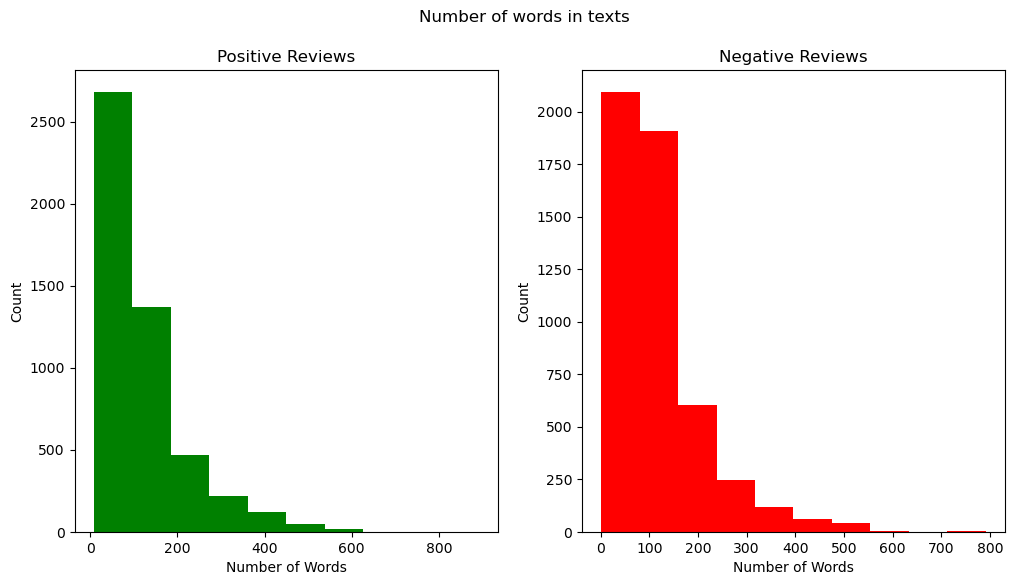

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))

text_len=positive_data.str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Count')
text_len=negative_data.str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Count')
fig.suptitle('Number of words in texts')
plt.show()

**Inference :**

- The number of negative words in a review compared to number of positive words are greater.
- The number of positive reviews are greater than number of negative words.

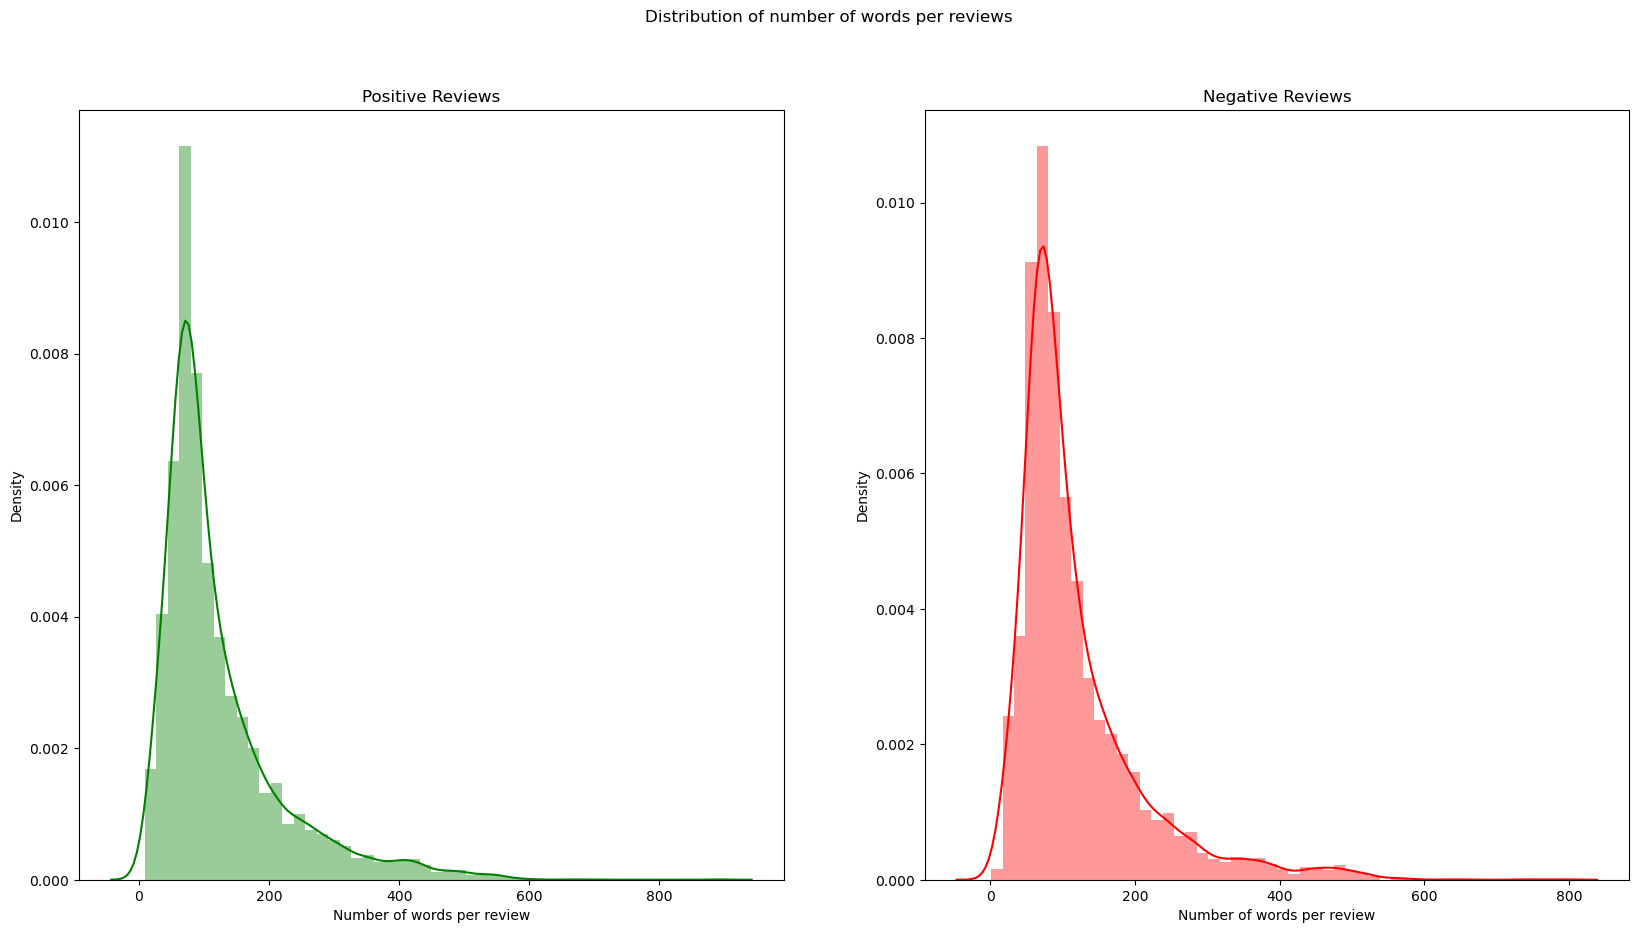

In [22]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : len(x) )
sns.distplot(word, ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of words per review')
word = negative_data.str.split().apply(lambda x :len(x) )
sns.distplot(word,ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of words per review')
fig.suptitle('Distribution of number of words per reviews')
plt.show()

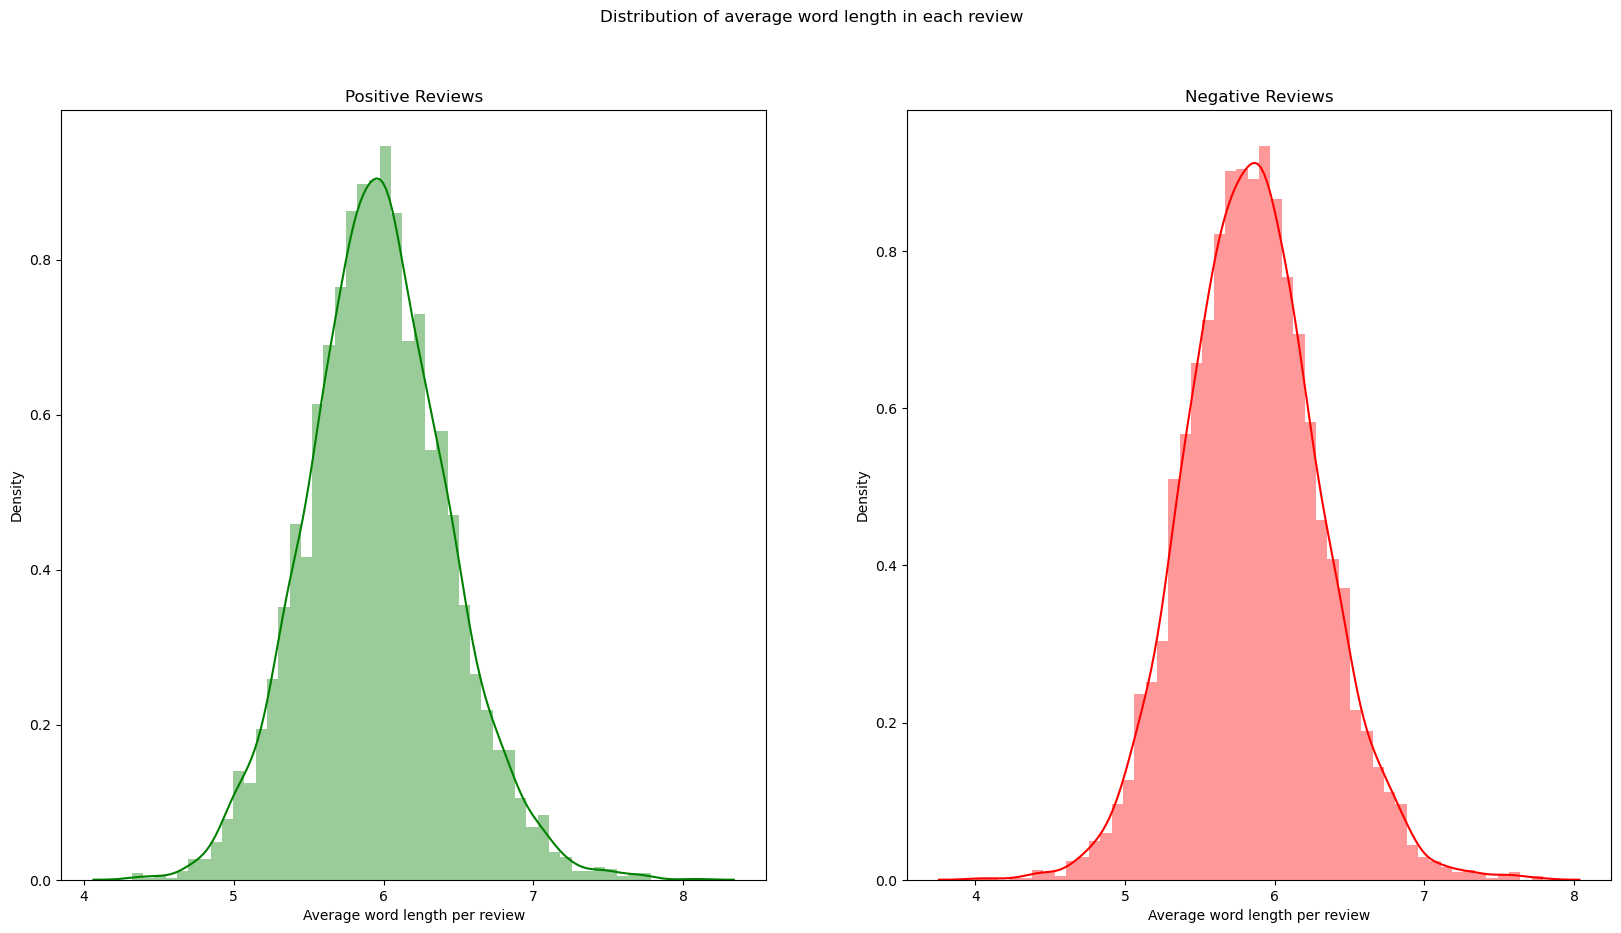

In [23]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Average word length per review')
word = negative_data.str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Average word length per review')
fig.suptitle('Distribution of average word length in each review')
plt.show()

**Inference :**
    
The average word length is normally distributed across every review 

#### Removing white spaces 

In [24]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.review)
corpus[:5]

['background', 'knowledge', 'movie', 'bought', 'sounded']

**Note :** These are the first five words of the first review

#### Count of 10 most frequent words

In [25]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common,columns = ['corpus','countv'])
most_common

corpus  countv
0   movie   16892
1    film   14997
2     one   10326
3    like    7748
4    good    5732
5    even    5011
6    time    4820
7   would    4818
8   story    4729
9  really    4698

These are the count most frequent words across the whole data 

In [26]:
most_common = most_common.sort_values('countv')

### Most Frequent words plot

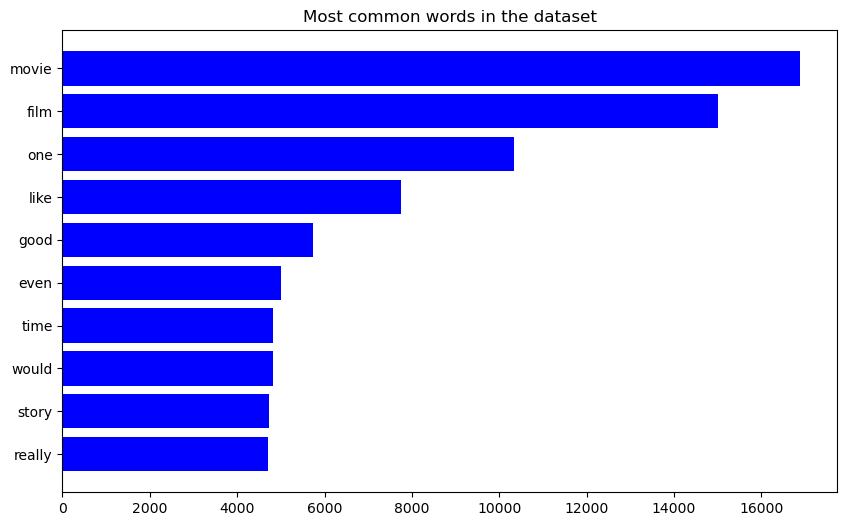

In [27]:
plt.figure(figsize =(10,6))
plt.yticks(range(len(most_common)), list(most_common.corpus))
plt.barh(range(len(most_common)), list(most_common.countv),align='center',color = 'blue')
plt.title('Most common words in the dataset')
plt.show()

**Inferences :**
    
Since it is IMBD review data it makes sense that the words like 'movie', 'film', 'story' will be most frequent plots.

### N_gram plots ( most frequent n words)

This function will give you the plots of n cosecutive most frequent words used together in a sequence 

In [28]:
def get_ngrams(review, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(review)
    bag_of_words = vec.transform(review) #sparse matrix of count_vectorizer
    sum_words = bag_of_words.sum(axis=0) #total number of words
    sum_words = np.array(sum_words)[0].tolist() #convert to list
    words_freq = [(word, sum_words[idx]) for word, idx in vec.vocabulary_.items()] #get word freqency for word location in count vec
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #key is used to perform sorting using word_freqency 
    return words_freq[:n]

### Unigram analysis (most frequent one word)

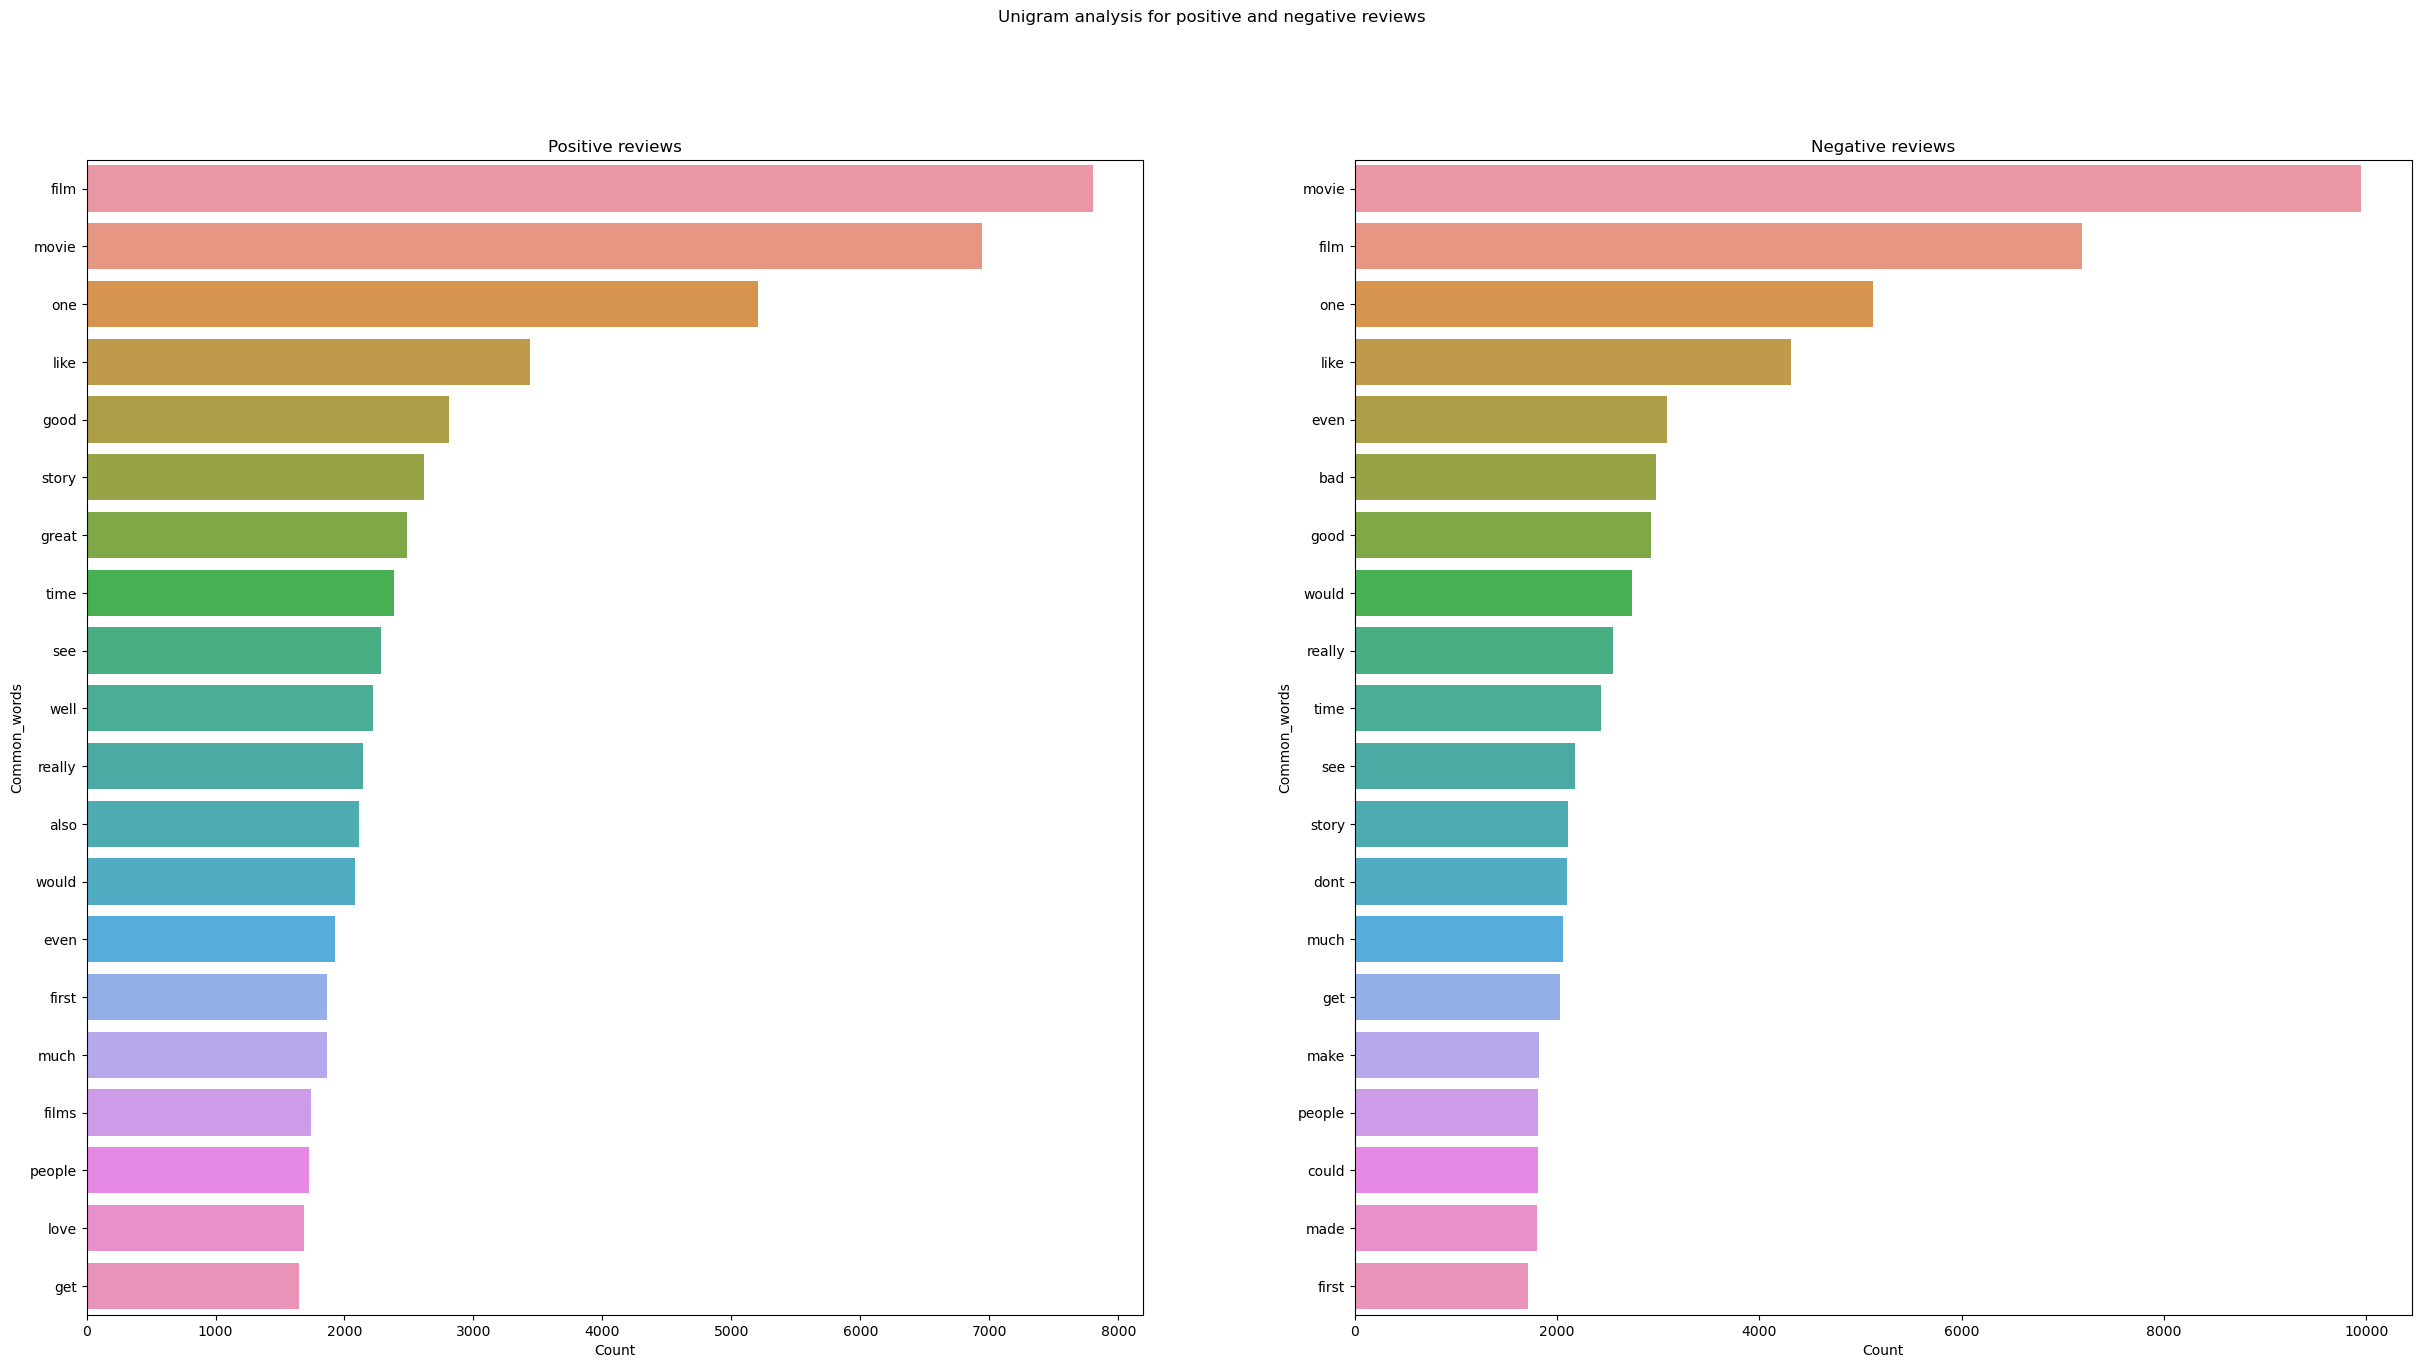

In [29]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
uni_positive = get_ngrams(positive_data,20,1)
uni_positive = dict(uni_positive)
temp = pd.DataFrame(list(uni_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
uni_negative = get_ngrams(negative_data,20,1)
uni_negative = dict(uni_negative)
temp = pd.DataFrame(list(uni_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Unigram analysis for positive and negative reviews')
plt.show()


### Bigram analysis (most frequent two words)

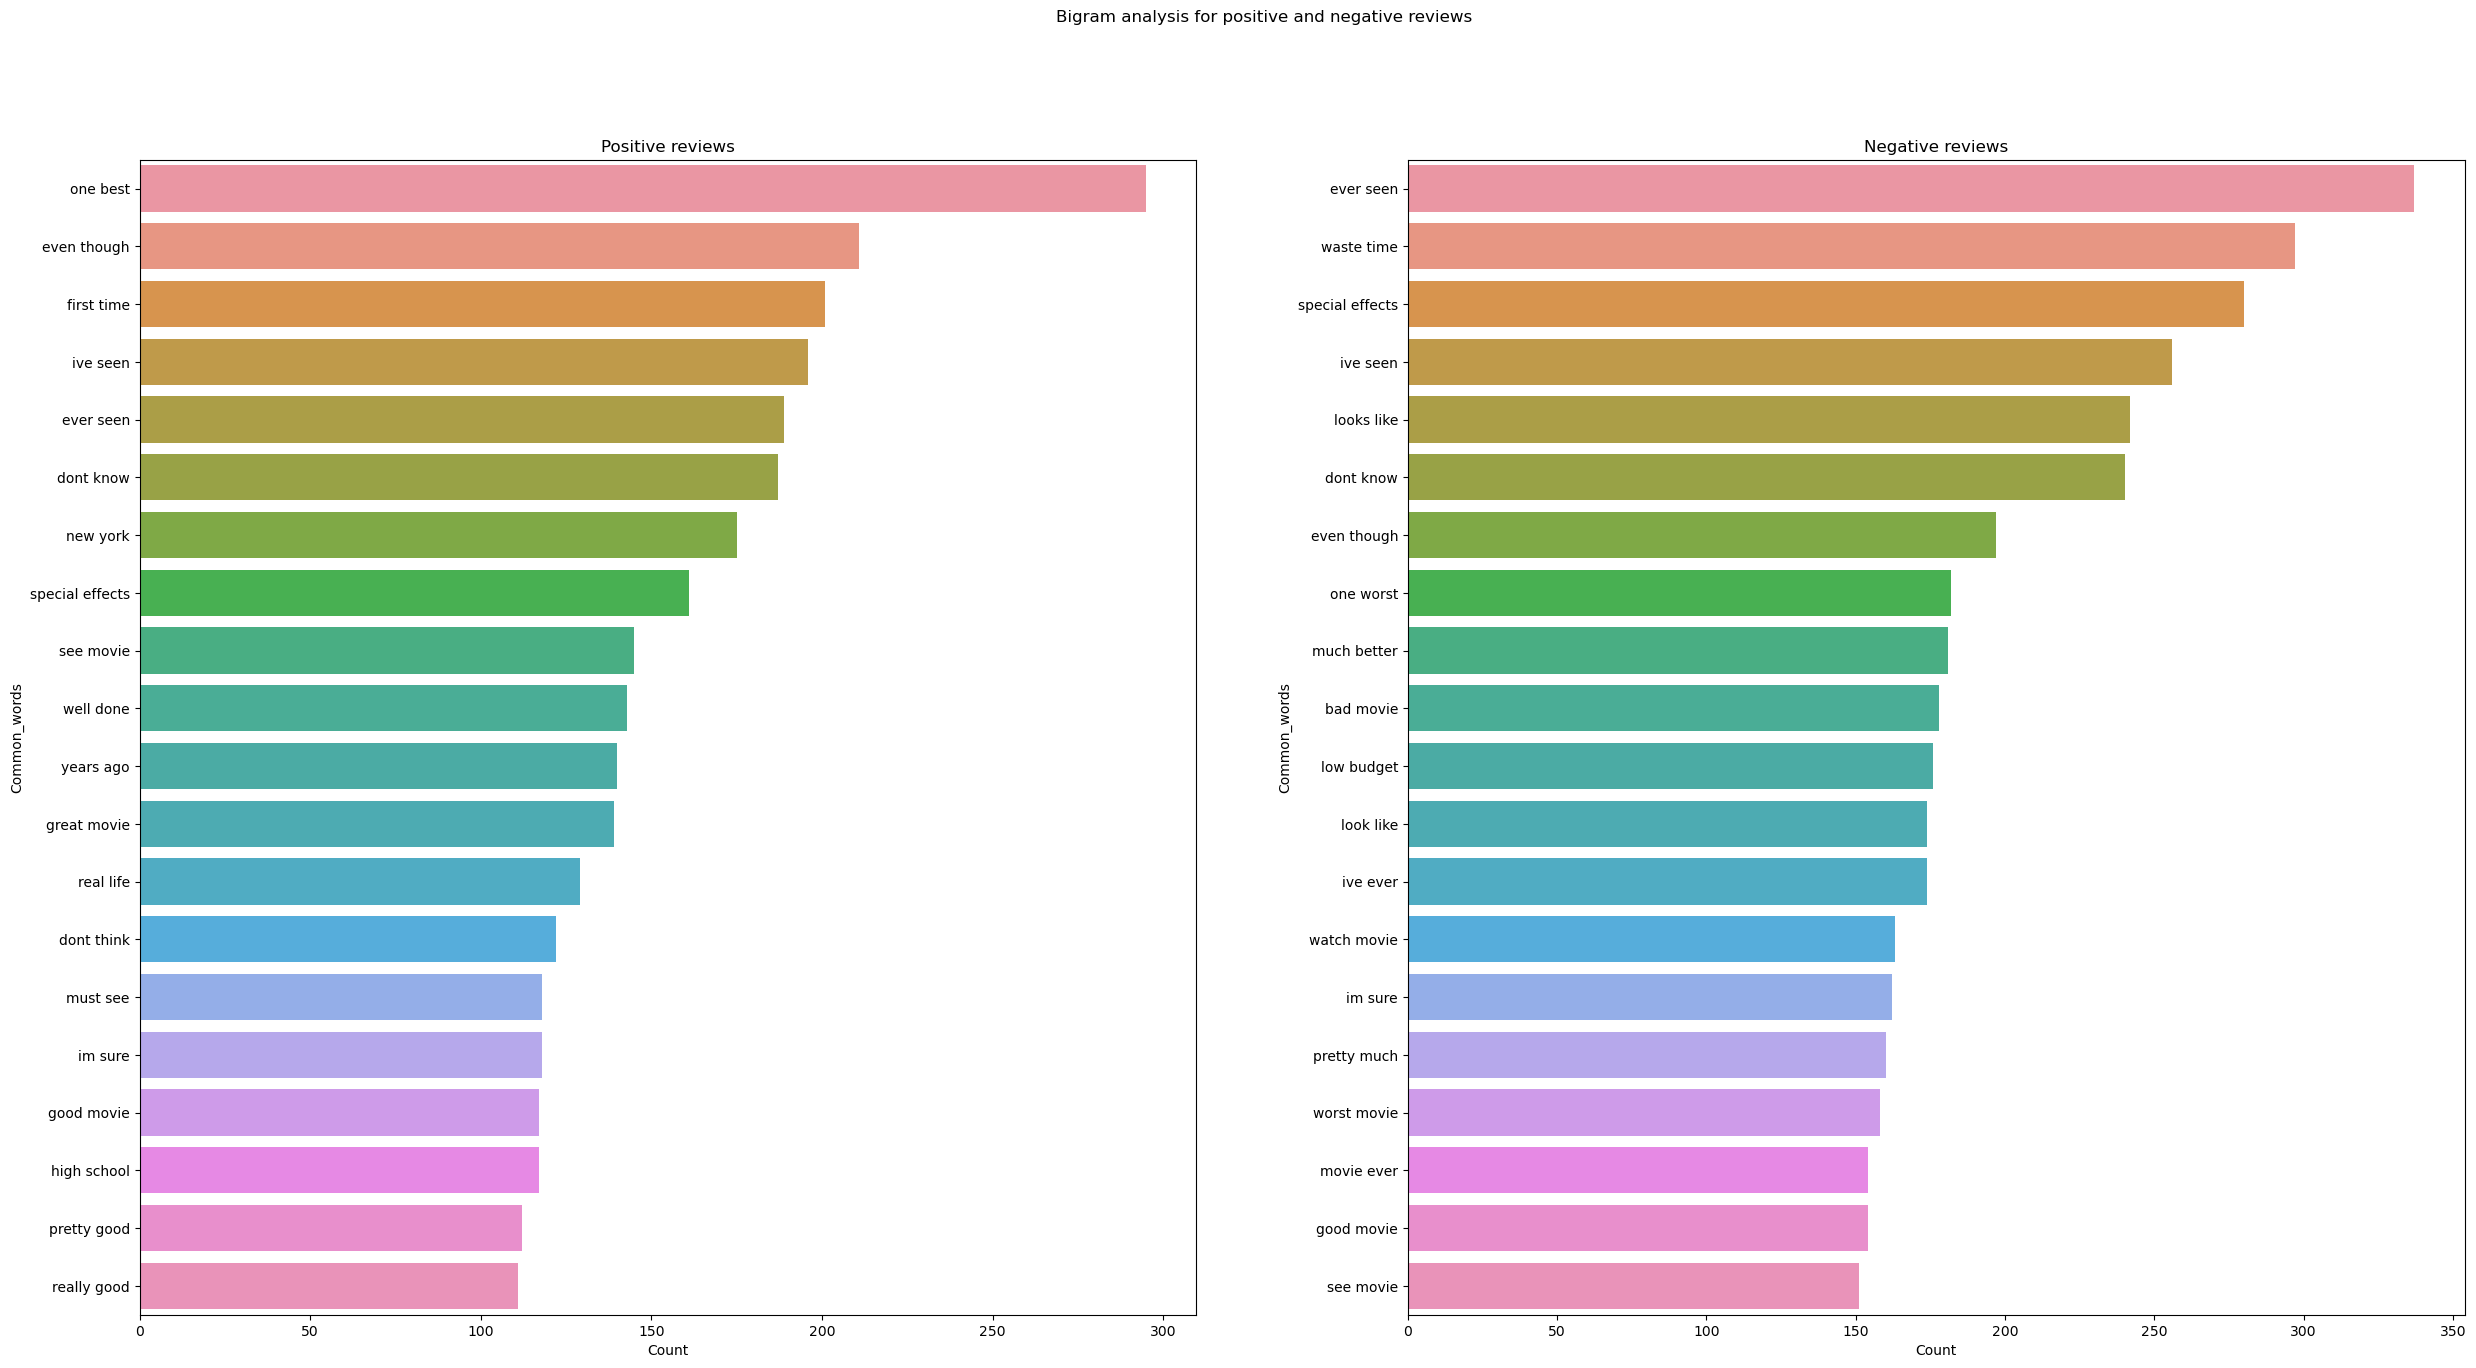

In [30]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
bi_positive = get_ngrams(positive_data,20,2)
bi_positive = dict(bi_positive)
temp = pd.DataFrame(list(bi_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
bi_negative = get_ngrams(negative_data,20,2)
bi_negative = dict(bi_negative)
temp = pd.DataFrame(list(bi_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Bigram analysis for positive and negative reviews')
plt.show()

### trigram analysis (most frequent three word)

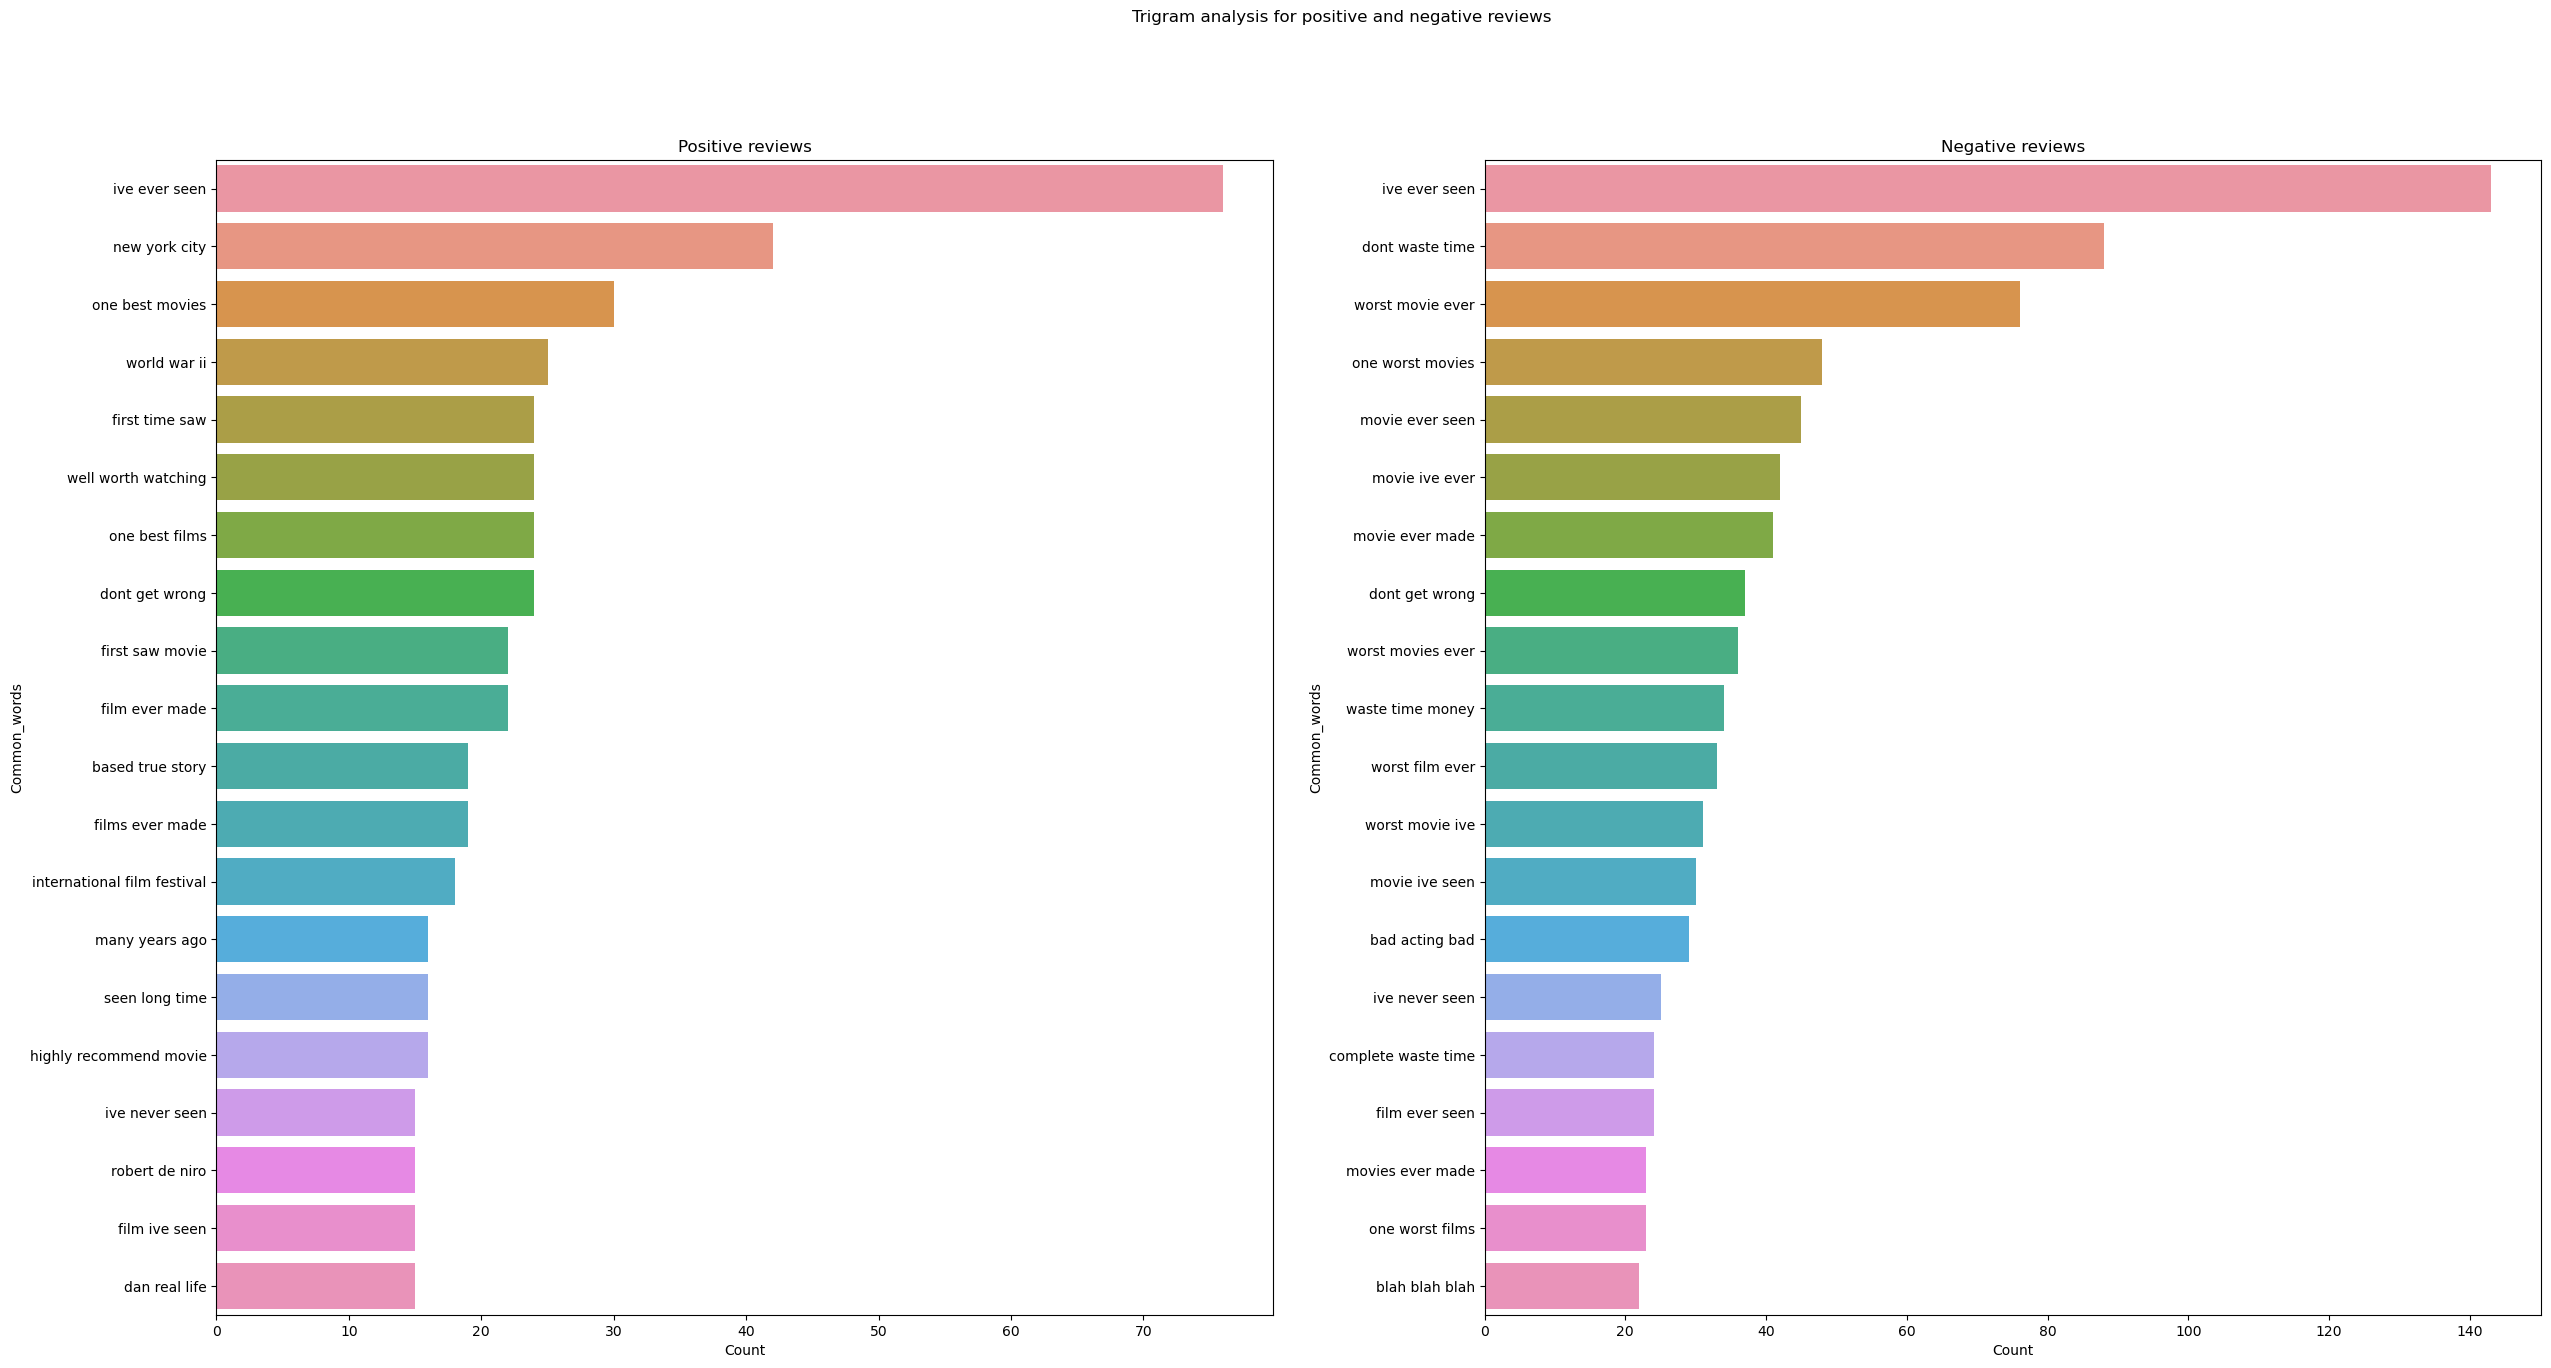

In [31]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
tri_positive = get_ngrams(positive_data,20,3)
tri_positive = dict(tri_positive)
temp = pd.DataFrame(list(tri_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
tri_negative = get_ngrams(negative_data,20,3)
tri_negative = dict(tri_negative)
temp = pd.DataFrame(list(tri_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Trigram analysis for positive and negative reviews')
plt.show()

In [32]:
# Check if the stopwords, special characters, extra spaces has removed or not
# check if the data is in lowercase or not
df.review

0       background knowledge movie bought sounded cool...
1       huge jane austen fan ordered movie amazonuk co...
2       nothing say wow anyone actually somebody sneak...
3       like jane austin novels love pride prejudice s...
4       day age incredible special movie effects one s...
                              ...                        
9995    first saw movie back early90s first released r...
9996    nyc 2022 greenhouse effect vanished oceans gri...
9997    individuals familiar asian cinema whole aware ...
9998    kids aged 7 14 got huge kick film gave copy ki...
9999    love movie animation great pokmon movie cgi lo...
Name: review, Length: 9990, dtype: object

First and last five reviews of the data 

# Label Encoding

In [33]:
#unique values of labels
label_encoder = LabelEncoder()
# Fit label encoder and transform the 'category' column
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

## Split the data 

In [82]:
#split target and features 
y = df['sentiment']
X = df.review

## Train-test split

In [83]:
# split the feature & target in 80% train & 20% test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7992,), (1998,), (7992,), (1998,))

In [36]:
#Applying count vectorizer
vectorizer = CountVectorizer()

# fit and transform train test vectorizer
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [37]:
# check dtype and format
X_train_vec, X_test_vec

(<7992x62621 sparse matrix of type '<class 'numpy.int64'>'
 	with 800706 stored elements in Compressed Sparse Row format>,
 <1998x62621 sparse matrix of type '<class 'numpy.int64'>'
 	with 192412 stored elements in Compressed Sparse Row format>)

# Modelling with Latent Semantic Analysis (LSA) 

In [38]:
# Perform Latent Semantic Analysis (LSA) on the TF-IDF data
n_components = 100
lsa_model = TruncatedSVD(n_components=n_components)

### Multinomial Naive Bayes (Multinomial-NB)

In [39]:
#Applying Tf-Idf transformation and building a model
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#Building a model using Naive Bayes(MultinomialNB)
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf,y_train)

MultinomialNB()

### LSA model with tf - idf

In [40]:
# Fit LSA model on the training TF-IDF data
X_train_lsa = lsa_model.fit_transform(X_train_tfidf)

# Transform the test TF-IDF data using the fitted LSA model
X_test_lsa = lsa_model.transform(X_test_tfidf)

### Logistic Regression with LSA

In [41]:
# Initialize models
logistic_regression_model = LogisticRegression()

# Fit the models on the LSA-transformed training data
logistic_regression_model.fit(X_train_lsa, y_train)

# Make predictions on the LSA-transformed test data
y_pred_logreg = logistic_regression_model.predict(X_test_lsa)# Evaluate the models' performance

# calculate accuracy
acc_logreg = accuracy_score(y_test, y_pred_logreg)

# Print the accuracies
print("Accuracy - Logistic Regression: {:.2f}%".format(acc_logreg * 100))

Accuracy - Logistic Regression: 84.08%


### Support Vector Machine (SVM) with LSA

In [42]:
svm_model = SVC()
svm_model.fit(X_train_lsa, y_train)
y_pred_svm = svm_model.predict(X_test_lsa)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy - Support Vector Machines (SVM): {:.2f}%".format(acc_svm * 100))


Accuracy - Support Vector Machines (SVM): 84.63%


### Random Forest (RF) with LSA

In [43]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_lsa, y_train)
y_pred_rf = random_forest_model.predict(X_test_lsa)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy - Random Forest: {:.2f}%".format(acc_rf * 100))


Accuracy - Random Forest: 81.03%


### Gradient Boosting Machines (GBM) with LSA

In [44]:
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train_lsa, y_train)
y_pred_gbm = gradient_boosting_model.predict(X_test_lsa)
acc_gbm = accuracy_score(y_test, y_pred_gbm)
print("Accuracy - Gradient Boosting Machines (GBM): {:.2f}%".format(acc_gbm * 100))


Accuracy - Gradient Boosting Machines (GBM): 83.03%


In [45]:
print("Accuracy - Logistic Regression: {:.2f}%".format(acc_logreg * 100))
print("Accuracy - Support Vector Machines (SVM): {:.2f}%".format(acc_svm * 100))
print("Accuracy - Random Forest: {:.2f}%".format(acc_rf * 100))
print("Accuracy - Gradient Boosting Machines (GBM): {:.2f}%".format(acc_gbm * 100))


Accuracy - Logistic Regression: 84.08%
Accuracy - Support Vector Machines (SVM): 84.63%
Accuracy - Random Forest: 81.03%
Accuracy - Gradient Boosting Machines (GBM): 83.03%


##### LSA gives us a decent accuracy with almost all the models

# Latent Dirichlet Allocation (LDA)  

In [46]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [47]:
vect =TfidfVectorizer(stop_words=stop) 
vect_text=vect.fit_transform(df.review)

In [48]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=2,
                        learning_method='batch',random_state=42) 
# n_components is the number of topics

In [49]:
lda_top=lda_model.fit_transform(vect_text)

In [50]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

(9990, 2)
[[0.94321643 0.05678357]
 [0.94344295 0.05655705]
 [0.94859863 0.05140137]
 ...
 [0.95904048 0.04095952]
 [0.931987   0.068013  ]
 [0.91885297 0.08114703]]


In [51]:
sum=0
for i in lda_top[0]:
    sum=sum+i
print(sum)  

1.0


In [52]:
# composition of doc 0 for eg
for j, tp in enumerate(lda_top):
    print("Document: ", j)    
    for i,topic in enumerate(lda_top[j]):
        print("Topic",i,": ",topic*100,"%")

Document:  0
Topic 0 :  94.3216430595178 %
Topic 1 :  5.678356940482207 %
Document:  1
Topic 0 :  94.34429547675582 %
Topic 1 :  5.6557045232441885 %
Document:  2
Topic 0 :  94.85986321100422 %
Topic 1 :  5.140136788995779 %
Document:  3
Topic 0 :  93.27522865464786 %
Topic 1 :  6.72477134535214 %
Document:  4
Topic 0 :  92.83260117314957 %
Topic 1 :  7.167398826850441 %
Document:  5
Topic 0 :  93.69361255042404 %
Topic 1 :  6.3063874495759675 %
Document:  6
Topic 0 :  94.67339756845129 %
Topic 1 :  5.326602431548705 %
Document:  7
Topic 0 :  95.21373975661847 %
Topic 1 :  4.786260243381537 %
Document:  8
Topic 0 :  95.48128451572154 %
Topic 1 :  4.518715484278461 %
Document:  9
Topic 0 :  91.6370169768999 %
Topic 1 :  8.3629830231001 %
Document:  10
Topic 0 :  94.75782960178353 %
Topic 1 :  5.242170398216464 %
Document:  11
Topic 0 :  93.81972045756496 %
Topic 1 :  6.180279542435047 %
Document:  12
Topic 0 :  95.66771877474804 %
Topic 1 :  4.332281225251944 %
Document:  13
Topic 0 :  

**Inference :**

We can see that Topic 0 dominantly present in every topic

In [53]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[0.60265914 0.59572638 0.76467899 ... 0.60561851 0.60853374 0.55494689]
 [0.50343687 0.50415686 0.51000591 ... 0.50466163 0.50378635 0.50228815]]
(2, 70407)


In [54]:
# most important words for each topic
vocab = vect.vocabulary_

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
witchy boorish hairline erics cadre culp francoisa the38 guntoting worldfamous 

Topic 1: 
misbehaviour curve scola barbooto autobiography boosted griffins callyou macho rehabilitated 



In [55]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic=""
    comp=lda_model.components_[index]
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
    for word in sorted_words:
        imp_words_topic=imp_words_topic+" "+word[0]

    wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
    plt.figure( figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

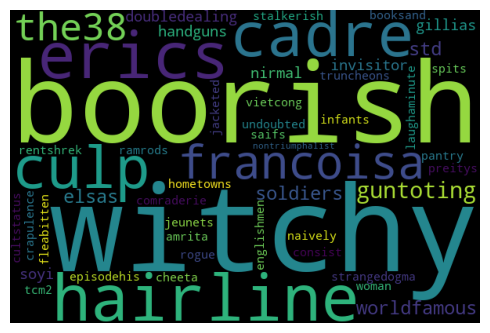

In [56]:
# topic 0
draw_word_cloud(0)

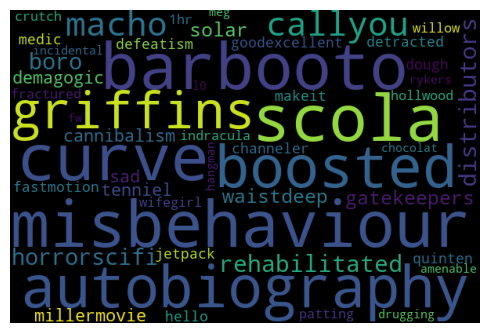

In [57]:
# topic 1
draw_word_cloud(1)  

In [58]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(lda_top, df['sentiment'], test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy_logreg = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy_logreg)

Logistic Regression Accuracy: 0.516016016016016


In [59]:
# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.5155155155155156


In [60]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.496996996996997


In [61]:
# Initialize the Gradient Boosting model
gbm_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbm = gbm_model.predict(X_test)

# Calculate accuracy for Gradient Boosting
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print("Gradient Boosting Accuracy:", accuracy_gbm)

Gradient Boosting Accuracy: 0.5105105105105106


In [62]:
print("Logistic Regression Accuracy:", accuracy_logreg)
print("SVM Accuracy:", accuracy_svm)
print("Random Forest Accuracy:", accuracy_rf)
print("Gradient Boosting Accuracy:", accuracy_gbm)

Logistic Regression Accuracy: 0.516016016016016
SVM Accuracy: 0.5155155155155156
Random Forest Accuracy: 0.496996996996997
Gradient Boosting Accuracy: 0.5105105105105106


**Conclusion :**
    
- LDA does not suits for this data, because we don't use the root form of the words in reviews generally
- LDA suits to classifications of poems, etc. Because, There authors use metaphorical,rhetoric rhyme, complicated words in the poems 

# Modelling without LSA & LDA

###### Base models ,   Bagging model (RF) ,   Boosting models

### Multinomial Naive Bayes (Multinomial-NB)

In [92]:
#Building Naive Bayes(MultinomialNB) model
model=MultinomialNB()
model.fit(X_train_vec, y_train)

#Tuning model using GridSearchCV
params = {'alpha': [0.1, 1, 10]}
grid_search = GridSearchCV(model,params, cv=5)
grid_search.fit(X_train_vec, y_train)
best_model = grid_search.best_estimator_

#Evaluating model's performance
y_pred = best_model.predict(X_test_vec)
accuracy_nb = accuracy_score(y_test, y_pred)
#accuracy for Naive bayes 
print("Naive Bayes Model Performance:")
print("NB count vectorizer Accuracy:", accuracy_nb)

Naive Bayes Model Performance:
NB count vectorizer Accuracy: 0.8528528528528528


### Tf-idf   Vectorizer 

In [86]:
#Applying Tf-Idf transformation and building a model
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#Building a model using Naive Bayes(MultinomialNB)
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf,y_train)

MultinomialNB()

### Naive Bayes Model with Tf-Idf 

In [87]:
#Tuning model using GridSearchCV
grid_search_tfidf = GridSearchCV(model_tfidf, params, cv=5)
grid_search_tfidf.fit(X_train_tfidf, y_train)
best_model_tfidf = grid_search_tfidf.best_estimator_

#Evaluating model's performance
y_pred_tfidf = best_model_tfidf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

#accuracy for naive bayes(tf-idf)
print("\nNaive Bayes Model with Tf-Idf Performance:")
print("NB Tf-Idf Accuracy:", accuracy_tfidf)


Naive Bayes Model with Tf-Idf Performance:
NB Tf-Idf Accuracy: 0.8458458458458459


# Random Forest (RF)

In [89]:
#calling random forest model
model = RandomForestClassifier(n_estimators=100, random_state=0)

#fitting rf
model.fit(X_train_vec, y_train)

#getting accuracy
y_pred = model.predict(X_test_vec)
accuracy_randomforest = accuracy_score(y_test, y_pred)
print("Rancom Forest Model Accuracy:", accuracy_randomforest)

Rancom Forest Model Accuracy: 0.8358358358358359


# Catboost Classifier

In [90]:

# Create an instance of CatBoostClassifier
catboost_classifier = CatBoostClassifier(random_state=1)

# Training the classifier using training data
catboost_classifier.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = catboost_classifier.predict(X_test_vec)

# Calculate accuracy
accuracy_cat = accuracy_score(y_test, y_pred)
print("Catboost model accuracy :", accuracy_cat)

Learning rate set to 0.025025
0:	learn: 0.6874022	total: 113ms	remaining: 1m 53s
1:	learn: 0.6818430	total: 162ms	remaining: 1m 20s
2:	learn: 0.6766146	total: 209ms	remaining: 1m 9s
3:	learn: 0.6716181	total: 256ms	remaining: 1m 3s
4:	learn: 0.6658118	total: 301ms	remaining: 59.9s
5:	learn: 0.6612876	total: 348ms	remaining: 57.7s
6:	learn: 0.6568644	total: 396ms	remaining: 56.1s
7:	learn: 0.6533613	total: 443ms	remaining: 54.9s
8:	learn: 0.6493554	total: 488ms	remaining: 53.8s
9:	learn: 0.6456283	total: 535ms	remaining: 53s
10:	learn: 0.6422240	total: 583ms	remaining: 52.5s
11:	learn: 0.6384683	total: 631ms	remaining: 51.9s
12:	learn: 0.6353896	total: 678ms	remaining: 51.5s
13:	learn: 0.6320270	total: 726ms	remaining: 51.2s
14:	learn: 0.6289727	total: 774ms	remaining: 50.8s
15:	learn: 0.6262493	total: 822ms	remaining: 50.6s
16:	learn: 0.6232352	total: 871ms	remaining: 50.3s
17:	learn: 0.6197763	total: 918ms	remaining: 50.1s
18:	learn: 0.6171390	total: 965ms	remaining: 49.8s
19:	learn: 

160:	learn: 0.4747437	total: 7.63s	remaining: 39.8s
161:	learn: 0.4743500	total: 7.68s	remaining: 39.7s
162:	learn: 0.4736887	total: 7.72s	remaining: 39.7s
163:	learn: 0.4731755	total: 7.77s	remaining: 39.6s
164:	learn: 0.4727498	total: 7.82s	remaining: 39.6s
165:	learn: 0.4723082	total: 7.86s	remaining: 39.5s
166:	learn: 0.4717934	total: 7.91s	remaining: 39.5s
167:	learn: 0.4712824	total: 7.96s	remaining: 39.4s
168:	learn: 0.4706999	total: 8s	remaining: 39.3s
169:	learn: 0.4700806	total: 8.05s	remaining: 39.3s
170:	learn: 0.4695676	total: 8.09s	remaining: 39.2s
171:	learn: 0.4690242	total: 8.14s	remaining: 39.2s
172:	learn: 0.4685923	total: 8.19s	remaining: 39.1s
173:	learn: 0.4682042	total: 8.23s	remaining: 39.1s
174:	learn: 0.4678774	total: 8.28s	remaining: 39s
175:	learn: 0.4673462	total: 8.32s	remaining: 39s
176:	learn: 0.4669300	total: 8.37s	remaining: 38.9s
177:	learn: 0.4665254	total: 8.41s	remaining: 38.9s
178:	learn: 0.4661236	total: 8.46s	remaining: 38.8s
179:	learn: 0.46560

320:	learn: 0.4155797	total: 15s	remaining: 31.8s
321:	learn: 0.4153218	total: 15.1s	remaining: 31.7s
322:	learn: 0.4150170	total: 15.1s	remaining: 31.7s
323:	learn: 0.4146998	total: 15.2s	remaining: 31.6s
324:	learn: 0.4142558	total: 15.2s	remaining: 31.6s
325:	learn: 0.4139621	total: 15.2s	remaining: 31.5s
326:	learn: 0.4136185	total: 15.3s	remaining: 31.5s
327:	learn: 0.4133430	total: 15.3s	remaining: 31.4s
328:	learn: 0.4130408	total: 15.4s	remaining: 31.4s
329:	learn: 0.4127676	total: 15.4s	remaining: 31.3s
330:	learn: 0.4123566	total: 15.5s	remaining: 31.3s
331:	learn: 0.4120278	total: 15.5s	remaining: 31.2s
332:	learn: 0.4117066	total: 15.6s	remaining: 31.2s
333:	learn: 0.4114226	total: 15.6s	remaining: 31.1s
334:	learn: 0.4110865	total: 15.7s	remaining: 31.1s
335:	learn: 0.4107605	total: 15.7s	remaining: 31s
336:	learn: 0.4103836	total: 15.8s	remaining: 31s
337:	learn: 0.4100575	total: 15.8s	remaining: 30.9s
338:	learn: 0.4097418	total: 15.8s	remaining: 30.9s
339:	learn: 0.4094

480:	learn: 0.3657864	total: 22.4s	remaining: 24.2s
481:	learn: 0.3654934	total: 22.4s	remaining: 24.1s
482:	learn: 0.3652417	total: 22.5s	remaining: 24.1s
483:	learn: 0.3649823	total: 22.5s	remaining: 24s
484:	learn: 0.3647353	total: 22.6s	remaining: 24s
485:	learn: 0.3644437	total: 22.6s	remaining: 23.9s
486:	learn: 0.3641438	total: 22.7s	remaining: 23.9s
487:	learn: 0.3638345	total: 22.7s	remaining: 23.8s
488:	learn: 0.3635583	total: 22.8s	remaining: 23.8s
489:	learn: 0.3633131	total: 22.8s	remaining: 23.7s
490:	learn: 0.3630768	total: 22.9s	remaining: 23.7s
491:	learn: 0.3628114	total: 22.9s	remaining: 23.6s
492:	learn: 0.3625493	total: 22.9s	remaining: 23.6s
493:	learn: 0.3622647	total: 23s	remaining: 23.5s
494:	learn: 0.3620061	total: 23s	remaining: 23.5s
495:	learn: 0.3617535	total: 23.1s	remaining: 23.5s
496:	learn: 0.3614502	total: 23.1s	remaining: 23.4s
497:	learn: 0.3611790	total: 23.2s	remaining: 23.4s
498:	learn: 0.3609255	total: 23.2s	remaining: 23.3s
499:	learn: 0.360652

640:	learn: 0.3271354	total: 29.8s	remaining: 16.7s
641:	learn: 0.3268775	total: 29.8s	remaining: 16.6s
642:	learn: 0.3266581	total: 29.9s	remaining: 16.6s
643:	learn: 0.3264695	total: 29.9s	remaining: 16.5s
644:	learn: 0.3262663	total: 30s	remaining: 16.5s
645:	learn: 0.3260827	total: 30s	remaining: 16.5s
646:	learn: 0.3258575	total: 30.1s	remaining: 16.4s
647:	learn: 0.3256713	total: 30.1s	remaining: 16.4s
648:	learn: 0.3254299	total: 30.2s	remaining: 16.3s
649:	learn: 0.3252326	total: 30.2s	remaining: 16.3s
650:	learn: 0.3250129	total: 30.3s	remaining: 16.2s
651:	learn: 0.3247877	total: 30.3s	remaining: 16.2s
652:	learn: 0.3245670	total: 30.3s	remaining: 16.1s
653:	learn: 0.3243864	total: 30.4s	remaining: 16.1s
654:	learn: 0.3242102	total: 30.4s	remaining: 16s
655:	learn: 0.3239976	total: 30.5s	remaining: 16s
656:	learn: 0.3238192	total: 30.5s	remaining: 15.9s
657:	learn: 0.3236020	total: 30.6s	remaining: 15.9s
658:	learn: 0.3233815	total: 30.6s	remaining: 15.8s
659:	learn: 0.323181

800:	learn: 0.2981417	total: 37.2s	remaining: 9.23s
801:	learn: 0.2979520	total: 37.2s	remaining: 9.19s
802:	learn: 0.2978011	total: 37.3s	remaining: 9.14s
803:	learn: 0.2976772	total: 37.3s	remaining: 9.09s
804:	learn: 0.2975233	total: 37.3s	remaining: 9.04s
805:	learn: 0.2973194	total: 37.4s	remaining: 9s
806:	learn: 0.2972680	total: 37.4s	remaining: 8.95s
807:	learn: 0.2970987	total: 37.5s	remaining: 8.9s
808:	learn: 0.2969680	total: 37.5s	remaining: 8.86s
809:	learn: 0.2968033	total: 37.6s	remaining: 8.81s
810:	learn: 0.2966133	total: 37.6s	remaining: 8.77s
811:	learn: 0.2964290	total: 37.7s	remaining: 8.72s
812:	learn: 0.2963366	total: 37.7s	remaining: 8.67s
813:	learn: 0.2962744	total: 37.8s	remaining: 8.63s
814:	learn: 0.2960960	total: 37.8s	remaining: 8.58s
815:	learn: 0.2958713	total: 37.9s	remaining: 8.53s
816:	learn: 0.2956920	total: 37.9s	remaining: 8.49s
817:	learn: 0.2955468	total: 37.9s	remaining: 8.44s
818:	learn: 0.2953536	total: 38s	remaining: 8.39s
819:	learn: 0.2952

960:	learn: 0.2766168	total: 44.5s	remaining: 1.81s
961:	learn: 0.2765189	total: 44.6s	remaining: 1.76s
962:	learn: 0.2763572	total: 44.6s	remaining: 1.71s
963:	learn: 0.2761938	total: 44.7s	remaining: 1.67s
964:	learn: 0.2760382	total: 44.7s	remaining: 1.62s
965:	learn: 0.2760107	total: 44.7s	remaining: 1.57s
966:	learn: 0.2758580	total: 44.8s	remaining: 1.53s
967:	learn: 0.2757140	total: 44.8s	remaining: 1.48s
968:	learn: 0.2756724	total: 44.9s	remaining: 1.44s
969:	learn: 0.2756434	total: 44.9s	remaining: 1.39s
970:	learn: 0.2755001	total: 45s	remaining: 1.34s
971:	learn: 0.2753717	total: 45s	remaining: 1.3s
972:	learn: 0.2752188	total: 45.1s	remaining: 1.25s
973:	learn: 0.2751121	total: 45.1s	remaining: 1.2s
974:	learn: 0.2749687	total: 45.2s	remaining: 1.16s
975:	learn: 0.2748124	total: 45.2s	remaining: 1.11s
976:	learn: 0.2746734	total: 45.3s	remaining: 1.06s
977:	learn: 0.2745859	total: 45.3s	remaining: 1.02s
978:	learn: 0.2744368	total: 45.4s	remaining: 973ms
979:	learn: 0.2743

In [94]:
#comparing models performance
print("Model Performance Comparison:")
print("Multinomial-NB Count Vectorizer Model Accuracy:", accuracy_nb)
print("Tf-Idf Model Accuracy:", accuracy_tfidf)
print("Rancom Forest Model Accuracy:", acc_rf)
print("Catboost model accuracy :", accuracy_cat)

Model Performance Comparison:
Multinomial-NB Count Vectorizer Model Accuracy: 0.8528528528528528
Tf-Idf Model Accuracy: 0.8458458458458459
Rancom Forest Model Accuracy: 0.8103103103103103
Catboost model accuracy : 0.8488488488488488


**Conclusion :** 

Multinomial-NB gives us the best accuracy of 85.28% out of all models 

### Overall Model comparisons 

Comparing accuracy of models with LSA & LDA and wthout LSA & LDA

In [96]:
print("Accuracy - Logistic Regression: {:.2f}%".format(acc_logreg * 100))
print("Accuracy - Support Vector Machines (SVM): {:.2f}%".format(acc_svm * 100))
print("Accuracy - Random Forest: {:.2f}%".format(acc_rf * 100))
print("Accuracy - Gradient Boosting Machines (GBM): {:.2f}%".format(acc_gbm * 100))
print("Logistic Regression Accuracy:", accuracy_logreg)
print("SVM Accuracy:", accuracy_svm)
print("Random Forest Accuracy:", accuracy_rf)
print("Gradient Boosting Accuracy:", accuracy_gbm)
print("Multinomial-NB Count Vectorizer Model Accuracy:", accuracy_nb)
print("Tf-Idf Model Accuracy:", accuracy_tfidf)
print("Rancom Forest Model Accuracy:", acc_rf)
print("Catboost model accuracy :", accuracy_cat)

Accuracy - Logistic Regression: 84.08%
Accuracy - Support Vector Machines (SVM): 84.63%
Accuracy - Random Forest: 81.03%
Accuracy - Gradient Boosting Machines (GBM): 83.03%
Logistic Regression Accuracy: 0.516016016016016
SVM Accuracy: 0.5155155155155156
Random Forest Accuracy: 0.496996996996997
Gradient Boosting Accuracy: 0.5105105105105106
Multinomial-NB Count Vectorizer Model Accuracy: 0.8528528528528528
Tf-Idf Model Accuracy: 0.8458458458458459
Rancom Forest Model Accuracy: 0.8103103103103103
Catboost model accuracy : 0.8488488488488488


**Conclusion :**

- Multinomial-NB Count Vectorizer Model gives us the highest accuracy of 85.28%
- The high accuracy says that our sentiment analysis model is performing quite well in predicting the sentiment (positive or negative) of movie reviews in the IMDB dataset.